In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from keras.models import Model
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Flatten, Dense, Conv1D, MaxPooling1D
from keras.layers import  BatchNormalization, LeakyReLU, Dropout, Activation

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## System Calls List

In [2]:
syscalls = [
"sys_enter_llistxattr",
"sys_enter_setgroups",
"sys_enter_lremovexattr",
"sys_enter_sethostname",
"sys_enter_accept",
"sys_enter_lseek",
"sys_enter_setitimer",
"sys_enter_accept4",
"sys_enter_lsetxattr",
"sys_enter_setns",
"sys_enter_acct",
"sys_enter_madvise",
"sys_enter_setpgid",
"sys_enter_add_key",
"sys_enter_mbind",
"sys_enter_setpriority",
"sys_enter_adjtimex",
"sys_enter_membarrier",
"sys_enter_setregid",
"sys_enter_personality",
"sys_enter_memfd_create",
"sys_enter_setresgid",
"sys_enter_bind",
"sys_enter_memfd_secret",
"sys_enter_setresuid",
"sys_enter_bpf",
"sys_enter_migrate_pages",
"sys_enter_setreuid",
"sys_enter_brk",
"sys_enter_mincore",
"sys_enter_setrlimit",
"sys_enter_capget",
"sys_enter_mkdirat",
"sys_enter_setsid",
"sys_enter_capset",
"sys_enter_mknodat",
"sys_enter_setsockopt",
"sys_enter_chdir",
"sys_enter_mlock",
"sys_enter_settimeofday",
"sys_enter_chroot",
"sys_enter_mlock2",
"sys_enter_setuid",
"sys_enter_clock_adjtime",
"sys_enter_mlockall",
"sys_enter_setxattr",
"sys_enter_clock_getres",
"sys_enter_mmap",
"sys_enter_shmat",
"sys_enter_clock_gettime",
"sys_enter_mount",
"sys_enter_shmctl",
"sys_enter_clock_nanosleep",
"sys_enter_mount_setattr",
"sys_enter_shmdt",
"sys_enter_clock_settime",
"sys_enter_move_mount",
"sys_enter_shmget",
"sys_enter_clone",
"sys_enter_move_pages",
"sys_enter_shutdown",
"sys_enter_clone3",
"sys_enter_mprotect",
"sys_enter_sigaltstack",
"sys_enter_close",
"sys_enter_mq_getsetattr",
"sys_enter_signalfd4",
"sys_enter_close_range",
"sys_enter_mq_notify",
"sys_enter_socket",
"sys_enter_connect",
"sys_enter_mq_open",
"sys_enter_socketpair",
"sys_enter_copy_file_range",
"sys_enter_mq_timedreceive",
"sys_enter_splice",
"sys_enter_delete_module",
"sys_enter_mq_timedsend",
"sys_enter_statfs",
"sys_enter_dup",
"sys_enter_mq_unlink",
"sys_enter_statx",
"sys_enter_dup3",
"sys_enter_mremap",
"sys_enter_swapoff",
"sys_enter_epoll_create1",
"sys_enter_msgctl",
"sys_enter_swapon",
"sys_enter_epoll_ctl",
"sys_enter_msgget",
"sys_enter_symlinkat",
"sys_enter_epoll_pwait",
"sys_enter_msgrcv",
"sys_enter_sync",
"sys_enter_epoll_pwait2",
"sys_enter_msgsnd",
"sys_enter_sync_file_range",
"sys_enter_eventfd2",
"sys_enter_msync",
"sys_enter_syncfs",
"sys_enter_execve",
"sys_enter_munlock",
"sys_enter_sysinfo",
"sys_enter_execveat",
"sys_enter_munlockall",
"sys_enter_syslog",
"sys_enter_exit",
"sys_enter_munmap",
"sys_enter_tee",
"sys_enter_exit_group",
"sys_enter_name_to_handle_at",
"sys_enter_tgkill",
"sys_enter_faccessat",
"sys_enter_nanosleep",
"sys_enter_timer_create",
"sys_enter_faccessat2",
"sys_enter_newfstat",
"sys_enter_timer_delete",
"sys_enter_fadvise64",
"sys_enter_newfstatat",
"sys_enter_timer_getoverrun",
"sys_enter_fallocate",
"sys_enter_newuname",
"sys_enter_timer_gettime",
"sys_enter_fanotify_init",
"sys_enter_open_by_handle_at",
"sys_enter_timer_settime",
"sys_enter_fanotify_mark",
"sys_enter_open_tree",
"sys_enter_timerfd_create",
"sys_enter_fchdir",
"sys_enter_openat",
"sys_enter_timerfd_gettime",
"sys_enter_fchmod",
"sys_enter_openat2",
"sys_enter_timerfd_settime",
"sys_enter_fchmodat",
"sys_enter_perf_event_open",
"sys_enter_times",
"sys_enter_fchown",
"sys_enter_pidfd_getfd",
"sys_enter_tkill",
"sys_enter_fchownat",
"sys_enter_pidfd_open",
"sys_enter_truncate",
"sys_enter_fcntl",
"sys_enter_pidfd_send_signal",
"sys_enter_umask",
"sys_enter_fdatasync",
"sys_enter_pipe2",
"sys_enter_umount",
"sys_enter_fgetxattr",
"sys_enter_pivot_root",
"sys_enter_unlinkat",
"sys_enter_finit_module",
"sys_enter_ppoll",
"sys_enter_unshare",
"sys_enter_flistxattr",
"sys_enter_prctl",
"sys_enter_userfaultfd",
"sys_enter_flock",
"sys_enter_pread64",
"sys_enter_utimensat",
"sys_enter_fremovexattr",
"sys_enter_preadv",
"sys_enter_vhangup",
"sys_enter_fsconfig",
"sys_enter_preadv2",
"sys_enter_vmsplice",
"sys_enter_fsetxattr",
"sys_enter_prlimit64",
"sys_enter_wait4",
"sys_enter_fsmount",
"sys_enter_process_madvise",
"sys_enter_waitid",
"sys_enter_fsopen",
"sys_enter_process_mrelease",
"sys_enter_write",
"sys_enter_fspick",
"sys_enter_process_vm_readv",
"sys_enter_writev",
"sys_enter_fstatfs",
"sys_enter_process_vm_writev",
"sys_enter_fsync",
"sys_enter_pselect6",
"sys_enter_ftruncate",
"sys_enter_ptrace",
"sys_enter_futex",
"sys_enter_pwrite64",
"sys_enter_get_mempolicy",
"sys_enter_pwritev",
"sys_enter_get_robust_list",
"sys_enter_pwritev2",
"sys_enter_getcpu",
"sys_enter_quotactl",
"sys_enter_getcwd",
"sys_enter_quotactl_fd",
"sys_enter_getdents64",
"sys_enter_read",
"sys_enter_getegid",
"sys_enter_readahead",
"sys_enter_geteuid",
"sys_enter_readlinkat",
"sys_enter_getgid",
"sys_enter_readv",
"sys_enter_getgroups",
"sys_enter_reboot",
"sys_enter_getitimer",
"sys_enter_recvfrom",
"sys_enter_getpeername",
"sys_enter_recvmmsg",
"sys_enter_getpgid",
"sys_enter_recvmsg",
"sys_enter_getpid",
"sys_enter_remap_file_pages",
"sys_enter_getppid",
"sys_enter_removexattr",
"sys_enter_getpriority",
"sys_enter_renameat",
"sys_enter_getrandom",
"sys_enter_renameat2",
"sys_enter_getresgid",
"sys_enter_request_key",
"sys_enter_getresuid",
"sys_enter_restart_syscall",
"sys_enter_getrlimit",
"sys_enter_rseq",
"sys_enter_getrusage",
"sys_enter_rt_sigaction",
"sys_enter_getsid",
"sys_enter_rt_sigpending",
"sys_enter_getsockname",
"sys_enter_rt_sigprocmask",
"sys_enter_getsockopt",
"sys_enter_rt_sigqueueinfo",
"sys_enter_gettid",
"sys_enter_rt_sigreturn",
"sys_enter_gettimeofday",
"sys_enter_rt_sigsuspend",
"sys_enter_getuid",
"sys_enter_rt_sigtimedwait",
"sys_enter_getxattr",
"sys_enter_rt_tgsigqueueinfo",
"sys_enter_init_module",
"sys_enter_sched_get_priority_max",
"sys_enter_inotify_add_watch",
"sys_enter_sched_get_priority_min",
"sys_enter_inotify_init1",
"sys_enter_sched_getaffinity",
"sys_enter_inotify_rm_watch",
"sys_enter_sched_getattr",
"sys_enter_io_cancel",
"sys_enter_sched_getparam",
"sys_enter_io_destroy",
"sys_enter_sched_getscheduler",
"sys_enter_io_getevents",
"sys_enter_sched_rr_get_interval",
"sys_enter_io_pgetevents",
"sys_enter_sched_setaffinity",
"sys_enter_io_setup",
"sys_enter_sched_setattr",
"sys_enter_io_submit",
"sys_enter_sched_setparam",
"sys_enter_io_uring_enter",
"sys_enter_sched_setscheduler",
"sys_enter_io_uring_register",
"sys_enter_sched_yield",
"sys_enter_io_uring_setup",
"sys_enter_seccomp",
"sys_enter_ioctl",
"sys_enter_semctl",
"sys_enter_ioprio_get",
"sys_enter_semget",
"sys_enter_ioprio_set",
"sys_enter_semop",
"sys_enter_kcmp",
"sys_enter_semtimedop",
"sys_enter_kexec_file_load",
"sys_enter_sendfile64",
"sys_enter_kexec_load",
"sys_enter_sendmmsg",
"sys_enter_keyctl",
"sys_enter_sendmsg",
"sys_enter_kill",
"sys_enter_sendto",
"sys_enter_landlock_add_rule",
"sys_enter_set_mempolicy",
"sys_enter_landlock_create_ruleset",
"sys_enter_set_robust_list",
"sys_enter_landlock_restrict_self",
"sys_enter_set_tid_address",
"sys_enter_lgetxattr",
"sys_enter_setdomainname",
"sys_enter_linkat",
"sys_enter_setfsgid",
"sys_enter_listen",
"sys_enter_setfsuid",
"sys_enter_listxattr",
"sys_enter_setgid"
]

## Loading CSV from Desktop

In [3]:
NUM_CLASSES = 2
CLASSES = np.array(['benign', 'malware'])
DATASET_DIR = "dataset/"
VECTOR_LENGTH = 32 * 32

label_encoder = LabelEncoder()
label_encoder.fit(syscalls)

def csvToVector(file_path):
    data = pd.read_csv(file_path)
    data_encoded = label_encoder.fit_transform(data['SYSTEM_CALL'])
    vector = np.zeros(VECTOR_LENGTH, dtype=np.uint8)
    syscall_nums = min(len(data_encoded), VECTOR_LENGTH)
    vector[:syscall_nums] = data_encoded[:syscall_nums]

    return vector

def load_data(dataset_dir):
    x = []
    y = []

    classes = [class_name for class_name in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, class_name))]
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.csv'):
                file_path = os.path.join(class_dir, file_name)
                vector = csvToVector(file_path)
                x.append(vector)
                y.append(class_idx)
                
    x = np.array(x)
    y = np.array(y)
    return x, y


In [4]:
X, y = load_data(DATASET_DIR)

## Train, Validation, Test Split and Nomalize

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train / 299.0
X_val = X_val / 299.0
X_test = X_test / 299.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_val = to_categorical(y_val, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1359, 1024)
(729, 1024)
(340, 1024)
(1359, 2)
(729, 2)
(340, 2)


## A Basic 1D CNN Architecture

In [7]:
input_layer = Input(shape=(VECTOR_LENGTH, 1))

x = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Flatten()(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1024, 32)          128       
                                                                 
 batch_normalization (BatchN  (None, 1024, 32)         128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1024, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 512, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 512, 64)           6208  

## Check Point

In [9]:
cp = ModelCheckpoint(
    filepath='CNN_1D_acc_CheckPoint.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

## Model Training

In [10]:
model.fit(X_train, 
          y_train,
          validation_data=(X_val, y_val),
          batch_size=32, 
          epochs=5000, 
          shuffle=True,
          callbacks=[cp]
)

Epoch 1/5000


2024-02-11 18:27:08.358430: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


43/43 [==============================] - ETA: 0s - loss: 0.5564 - accuracy: 0.8300
Epoch 1: val_accuracy improved from -inf to 0.48529, saving model to CNN_1D_acc_CheckPoint.h5
43/43 [==============================] - 4s 55ms/step - loss: 0.5564 - accuracy: 0.8300 - val_loss: 0.8683 - val_accuracy: 0.4853
Epoch 2/5000
43/43 [==============================] - ETA: 0s - loss: 0.2819 - accuracy: 0.8926
Epoch 2: val_accuracy did not improve from 0.48529
43/43 [==============================] - 1s 35ms/step - loss: 0.2819 - accuracy: 0.8926 - val_loss: 0.9095 - val_accuracy: 0.4853
Epoch 3/5000
43/43 [==============================] - ETA: 0s - loss: 0.2458 - accuracy: 0.9132
Epoch 3: val_accuracy did not improve from 0.48529
43/43 [==============================] - 1s 34ms/step - loss: 0.2458 - accuracy: 0.9132 - val_loss: 0.7760 - val_accuracy: 0.4853
Epoch 4/5000
43/43 [==============================] - ETA: 0s - loss: 0.2271 - accuracy: 0.9220
Epoch 4: val_accuracy did not improve from 

## Load best Checkpoint

In [11]:
cp_model = load_model('CNN_1D_acc_CHeckPoint.h5')
cp_model.evaluate(X_test, y_test, batch_size=1000)

1/1 [==============================] - 0s 375ms/step - loss: 0.1906 - accuracy: 0.9561


[0.1905589997768402, 0.9561042785644531]

## Evaluate

In [12]:
y_pred = cp_model.predict(X_test)

23/23 [==============================] - 0s 8ms/step


In [13]:
preds_single = CLASSES[np.argmax(y_pred, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

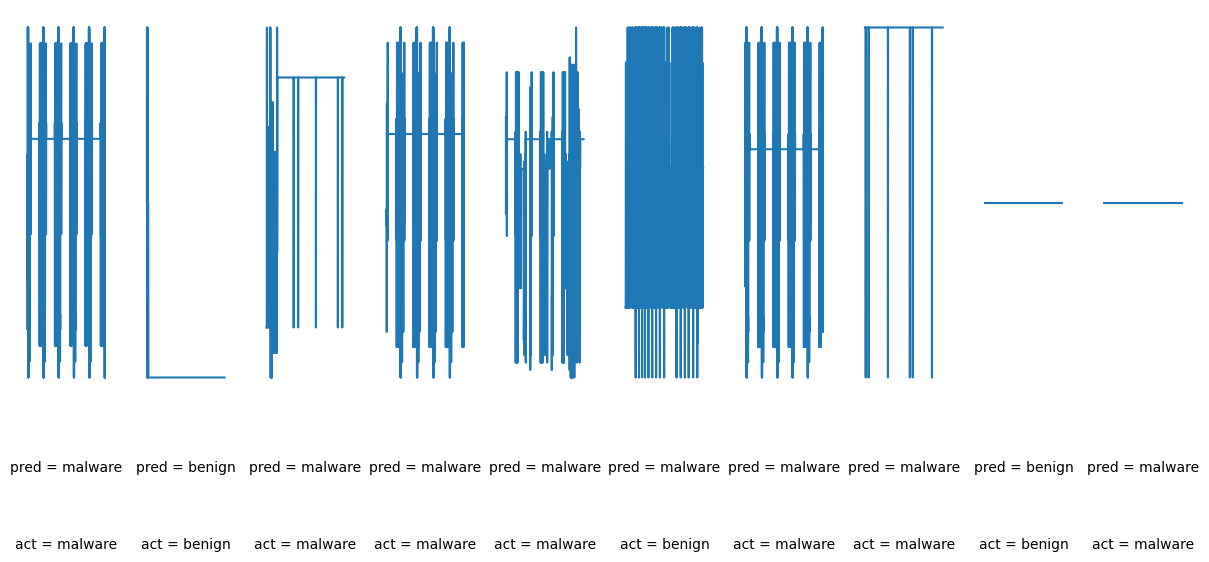

In [14]:
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    data = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.plot(data)
    ax.axis('off')
    ax.text(0.5, -0.2, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.4, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)

plt.show()


In [15]:
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       376
           1       0.94      0.97      0.96       353

    accuracy                           0.96       729
   macro avg       0.96      0.96      0.96       729
weighted avg       0.96      0.96      0.96       729



In [16]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

class_labels = ['Benign', 'Malware']

conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
         Benign  Malware
Benign      355       21
Malware      11      342
